<a href="https://colab.research.google.com/github/saritmaitra/AL-VAR-VECM-/blob/main/Casual_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
import statsmodels.api as sm
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving AL_final_data.csv to AL_final_data.csv


In [11]:
data = pd.read_csv("AL_final_data.csv")
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.tail()

,timestamp,es,eur_usd,gbp_usd,gc,nq,usd_jpy
29340,2020-05-29 20:56:00,3027.25,1111740.0,1235400.0,1731.50,9588.625,107675000.0
29341,2020-05-29 20:57:00,3027.25,1111750.0,1235450.0,1731.20,9588.500,107830000.0
29342,2020-05-29 20:58:00,3027.25,1111650.0,1235450.0,1731.45,9588.625,107830000.0
29343,2020-05-29 20:59:00,3027.25,1113400.0,1235450.0,1731.30,9587.375,107835000.0
29344,2020-05-29 21:00:00,3027.25,1113400.0,1237150.0,1731.35,9591.125,107835000.0


In [12]:
data = data.set_index('timestamp')
# Converting the index as date
data.index = pd.to_datetime(data.index)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29345 entries, 2020-05-01 00:00:00 to 2020-05-29 21:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   es       29345 non-null  float64
 1   eur_usd  29345 non-null  float64
 2   gbp_usd  29345 non-null  float64
 3   gc       29345 non-null  float64
 4   nq       29345 non-null  float64
 5   usd_jpy  29345 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


In [13]:
data_log = np.log(data)
data_log

,es,eur_usd,gbp_usd,gc,nq,usd_jpy
timestamp,,,,,,
2020-05-01 00:00:00,7.964547,13.905776,14.045145,7.435939,9.087735,18.491149
2020-05-01 00:01:00,7.963938,13.905548,14.044982,7.435792,9.087184,18.491773
2020-05-01 00:02:00,7.963678,13.905502,14.044847,7.435821,9.086788,18.491852
2020-05-01 00:03:00,7.963504,13.905456,14.044688,7.435674,9.086674,18.491898
2020-05-01 00:04:00,7.963895,13.905525,14.044664,7.435350,9.087169,18.491852
...,...,...,...,...,...,...
2020-05-29 20:56:00,8.015410,13.921437,14.026905,7.456743,9.168333,18.494628
2020-05-29 20:57:00,8.015410,13.921446,14.026946,7.456570,9.168320,18.496066
2020-05-29 20:58:00,8.015410,13.921356,14.026946,7.456714,9.168333,18.496066


In [14]:
eur_usd = np.array(data_log.eur_usd)
gbp_usd = np.array(data_log.gbp_usd)

In [15]:
# y is the time series, x is the covariate

X = eur_usd
y = gbp_usd

In [16]:
X = X.reshape(-1)
X

array([13.90577622, 13.90554777, 13.90550207, ..., 13.92135596,
       13.92292895, 13.92292895])

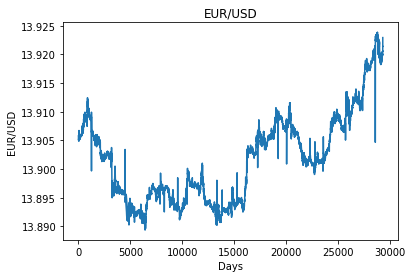

In [17]:
plt.plot(X)
plt.title("EUR/USD")
plt.xlabel("Days")
plt.ylabel("EUR/USD")
plt.show()

In [18]:
y=y.reshape(-1)
y

array([14.045145  , 14.04498205, 14.04484689, ..., 14.02694583,
       14.02694583, 14.02832091])

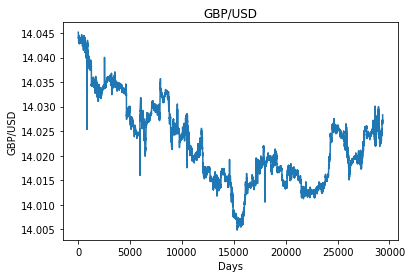

In [19]:
plt.plot(y)
plt.title("GBP/USD")
plt.xlabel("Days")
plt.ylabel("GBP/USD")
plt.show()

In [20]:
y.shape

(29345,)

In [21]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 29000]
post_period = [29001, 29344]

The idea is to used the predictions of the fitted model (depicted in blue) as a reference to what probably would had been observed with no intervention taking place.

In [ ]:
pip install pycausalimpact

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    14.02              4824.42
Prediction (s.d.)         14.03 (0.0)        4824.82 (0.59)
95% CI                    [14.02, 14.03]     [4823.65, 4825.97]

Absolute effect (s.d.)    -0.0 (0.0)         -0.4 (0.59)
95% CI                    [-0.0, 0.0]        [-1.54, 0.77]

Relative effect (s.d.)    -0.01% (0.01%)     -0.01% (0.01%)
95% CI                    [-0.03%, 0.02%]    [-0.03%, 0.02%]

Posterior tail-area probability p: 0.24
Posterior prob. of a causal effect: 76.02%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 14.02. In the absence of an
intervention, we would have expected an average response of 14.03.
The 95% interval of this counterfactual prediction is [14.02, 14.03].
Subtracting this prediction from the observed respon

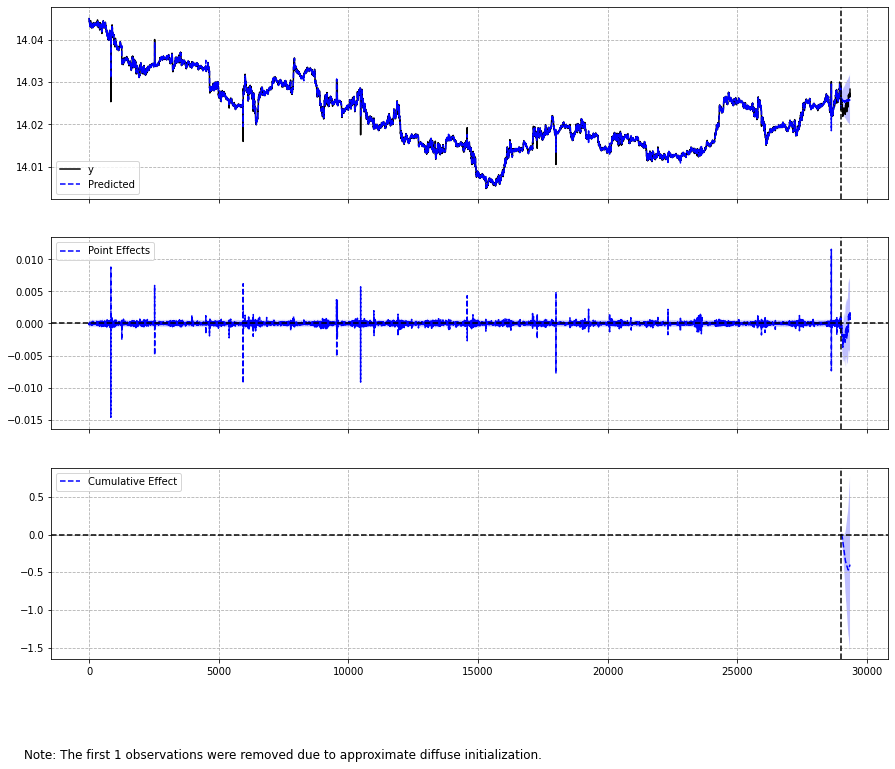

In [31]:
from causalimpact import CausalImpact

ci = CausalImpact(data, pre_period, post_period, prior_level_sd=None)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

- the "origial" series versus its predicted one
- the "points effects" (which is the difference between original series and predicted)
- finally the "cumulative" effect which is basically the summation of the point effects accumulated over time.

In [33]:
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 14.02. In the absence of an
intervention, we would have expected an average response of 14.03.
The 95% interval of this counterfactual prediction is [14.02, 14.03].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -0.0 with a 95% interval of
[-0.0, 0.0]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 4824.42.
Had the intervention not taken place, we would have expected
a sum of 4824.82. The 95% interval of this prediction is [4823.65, 4825.97].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a decrease of -0

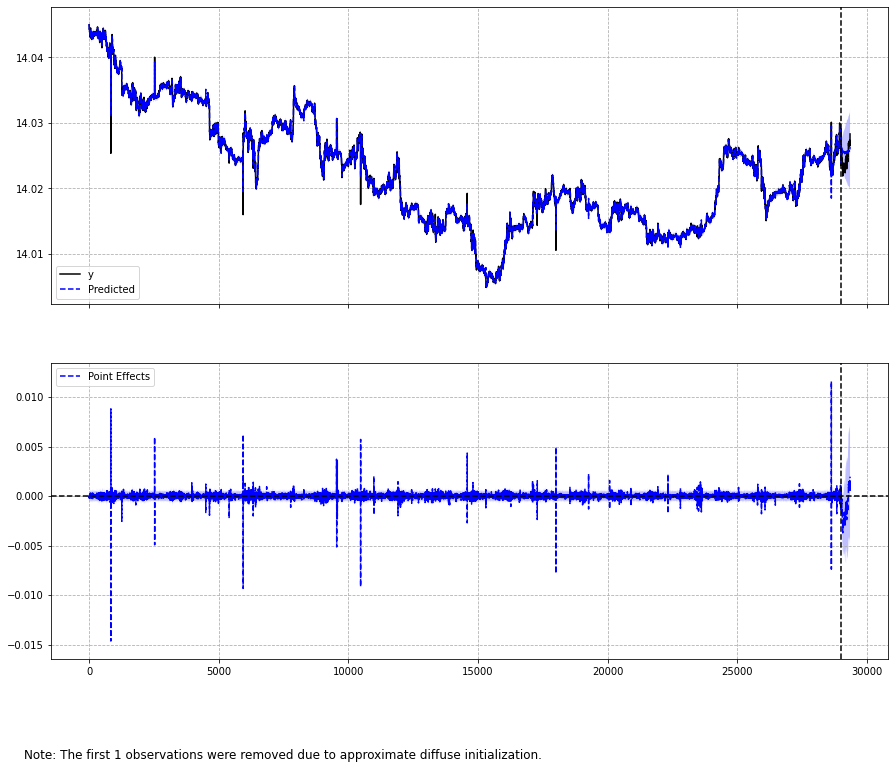

In [34]:
ci.plot(panels=['original', 'pointwise'], figsize=(15, 12))